# Stock prediction

Welcome to my attempt in stock prediction. Not so conclusive results but at least now you have the tools to understan why. Sklearn tools and a simple NN with Tensorflow were tested here. RNN/LSTM Networks seem to be a scam for this field of application from what i saw, so i didn't even tried them.

For any question / feedback please contact me on https://github.com/BmnQuentin

# Data collection 

In [ ]:
import pandas as pd 
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt
from time import sleep, time
import numpy as np

In [ ]:
def get_indicators(stock):
    ts = TimeSeries(key='BHE3BCBJB782W3I3', output_format='pandas', indexing_type='date')
    ti = TechIndicators(key='BHE3BCBJB782W3I3', output_format='pandas', indexing_type='date')
#     try:
    indicators, _ = ts.get_daily_adjusted(stock, outputsize='full')
#     except:
#         return(None)
    bbands, _ = ti.get_bbands(symbol='EN.PA', interval='daily')
    sma, _ = ti.get_sma(symbol='EN.PA', interval='daily')
    ema, _ = ti.get_ema(symbol='EN.PA', interval='daily')
    #vwap, _ = ti.get_vwap(symbol='EN.PA', interval='daily')
    macd, _ = ti.get_macd(symbol='EN.PA', interval='daily')
    sleep(60)
    stoch, _ = ti.get_stoch(symbol='EN.PA', interval='daily')
    rsi, _ = ti.get_rsi(symbol='EN.PA', interval='daily')
    concat=pd.concat([indicators, bbands, sma, ema, macd, stoch, rsi], axis=1, join='inner')
    concat=concat.rename(columns={"1. open": "Open", "2. high": "High", "3. low": "Low", "4. close": "Close", 
                       "5. adjusted close": "Adj Close", "6. volume": "Vol", "7. dividend amount": "Div amt",
                       "8. split coefficient": "Split"})
    return concat

In [ ]:
data=get_indicators("EN.PA")

In [ ]:
data.to_csv("Bouygues untreated.csv")

# Data preparation

## Adding values

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("./StockHistory/History_stock_FP.PA.csv", index_col="date") 
data= data.sort_index(axis = 0, ascending=False)

In [2]:
df=data.copy()

In [3]:
df["Prev_open"]=df["Open"].shift(periods=-1)
df["Prev_close"]=df["Close"].shift(periods=-1)
df["Percent_prev"]=round((df["Prev_close"]-df["Prev_open"])/df["Prev_open"]*100,2)

In [4]:
bins = [-1000, 0.1, 1000]
group_names = [0,1]
df['Target'] = pd.cut(df['Percent_prev'], bins, labels=group_names)
df.head()

Open    High    Low   Close  Adj Close        Vol  Div amt  \
date                                                                       
2020-01-06  50.290  50.930  50.13  50.440    50.4400  7596924.0      0.0   
2020-01-03  49.955  50.560  49.85  50.380    49.7200  4960724.0      0.0   
2020-01-02  49.410  50.090  49.41  49.815    49.1624  4326276.0      0.0   
2019-12-31  49.140  49.215  49.04  49.200    48.5555  1359317.0      0.0   
2019-12-30  49.240  49.685  49.06  49.185    48.5407  3075084.0      0.0   

            Split  Real Upper Band  Real Lower Band  ...    SlowK      RSI  \
date                                                 ...                     
2020-01-06    1.0          50.6212          47.0173  ...  78.6804  64.1153   
2020-01-03    1.0          50.4378          46.8697  ...  60.2636  63.7985   
2020-01-02    1.0          50.1991          46.7914  ...  40.7111  60.6941   
2019-12-31    1.0          50.1099          46.5626  ...  30.6619  56.8695   
2019-12-30    1.0          50.0378          46.4227  ...  52.1651  56.7720   

                ADX       CCI  Aroon Down  Aroon Up  Prev_open  Prev_close  \
date                                                                         
2020-01-06  11.3427  145.8097        15.0     100.0     49.955      50.380   
2020-01-03  10.2933  138.0359         0.0     100.0     49.410      49.815   
2020-01-02   9.3804  107.1675         0.0     100.0     49.140      49.200   
2019-12-31   8.6798   65.9737         5.0      90.0     49.240      49.185   
2019-12-30   8.5020   86.2828        10.0      95.0     49.665      49.290   

            Percent_prev  Target  
date                              
2020-01-06          0.85       1  
2020-01-03          0.82       1  
2020-01-02          0.12       1  
2019-12-31         -0.11       0  
2019-12-30         -0.76       0  

[5 rows x 27 columns]

In [5]:
df=df.drop(['Div amt','Split', 'Adj Close'], axis=1)

## Splitting the dataset

In [6]:
df=df.dropna()
X=np.array(df.iloc[:,:-4])
y=np.array(df['Target'])

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# scale the feature MinMax, build array
min_max_scaler = MinMaxScaler()
X_normal = min_max_scaler.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test= train_test_split(X_normal,y, test_size=0.25, random_state = 42)

# Classifiers

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, SVR
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from time import time

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [10]:
names = ["Nearest Neighbors", "Linear SVM", "SVC high C", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="linear", C=1000),
    SVC(gamma=2, C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

assert len(names)==len(classifiers)

In [11]:
def prediction_classifier(name, clf):
    timer=time()
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    y_pred = clf.predict(X_test)
    return [score, round(time()-timer,1), y_pred]

In [12]:
results=pd.DataFrame(columns=['Score', 'Time', 'Results', 'Report'])
y_true=y_test
for (name, classifier) in zip(names, classifiers):
    timer=time()
    clf=classifier
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    y_pred = clf.predict(X_test)
    timer=time()-timer
    report=classification_report(y_true, y_pred)
    results.loc[name] = [score, timer, y_pred, report]
    print(name, " done")

Nearest Neighbors  done
Linear SVM  done
SVC high C  done
RBF SVM  done
Decision Tree  done
Random Forest  done
Neural Net  done
AdaBoost  done
Naive Bayes  done
QDA  done


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [13]:
results.loc["TEST"]=[0,0,y_test,""]
results

Score      Time  \
Nearest Neighbors  0.545169  0.089976   
Linear SVM         0.620581  0.430160   
SVC high C         0.681854  5.238134   
RBF SVM            0.651218  0.709139   
Decision Tree      0.635507  0.029579   
Random Forest      0.616654  0.028046   
Neural Net         0.642577  1.019621   
AdaBoost           0.663001  0.420641   
Naive Bayes        0.608013  0.004011   
QDA                0.534171  0.010532   
TEST               0.000000  0.000000   

                                                             Results  \
Nearest Neighbors  [1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, ...   
Linear SVM         [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, ...   
SVC high C         [0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, ...   
RBF SVM            [0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, ...   
Decision Tree      [0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, ...   
Random Forest      [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, ...   
Neural Net         [0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, ...   
AdaBoost           [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, ...   
Naive Bayes        [0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, ...   
QDA                [1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, ...   
TEST               [0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, ...   

                                                              Report  
Nearest Neighbors               precision    recall  f1-score   s...  
Linear SVM                      precision    recall  f1-score   s...  
SVC high C                      precision    recall  f1-score   s...  
RBF SVM                         precision    recall  f1-score   s...  
Decision Tree                   precision    recall  f1-score   s...  
Random Forest                   precision    recall  f1-score   s...  
Neural Net                      precision    recall  f1-score   s...  
AdaBoost                        precision    recall  f1-score   s...  
Naive Bayes                     precision    recall  f1-score   s...  
QDA                             precision    recall  f1-score   s...  
TEST

In [14]:
clf=SVC(kernel="linear", C=1000)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
report=classification_report(y_true, y_pred)
results.loc[name] = [score, timer, y_pred, report]
coeffs=clf.coef_

In [15]:
np.where(coeffs==np.amin(coeffs))

(array([0], dtype=int64), array([1], dtype=int64))

In [16]:
print(results.iat[3,3])

             precision    recall  f1-score   support

          0       0.67      0.70      0.69       688
          1       0.63      0.59      0.61       585

avg / total       0.65      0.65      0.65      1273



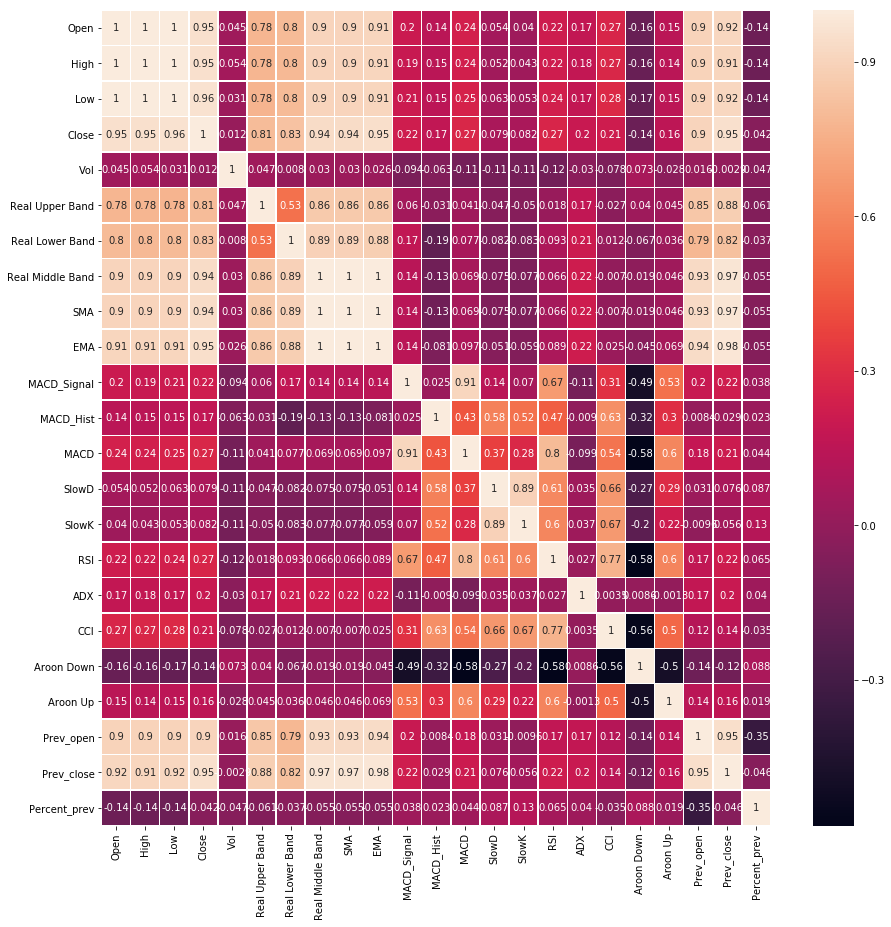

In [18]:
import seaborn as sn
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
corrMatrix=df.corr()
sn.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)

In [22]:
df[df.columns[:-4]].corrwith(df['Percent_prev'])

Open               -0.141778
High               -0.142231
Low                -0.138767
Close              -0.041659
Vol                -0.047478
Real Upper Band    -0.061334
Real Lower Band    -0.037053
Real Middle Band   -0.055430
SMA                -0.055430
EMA                -0.055259
MACD_Signal         0.037832
MACD_Hist           0.023066
MACD                0.043577
SlowD               0.086954
SlowK               0.125431
RSI                 0.065032
ADX                 0.040232
CCI                -0.035359
Aroon Down          0.087923
Aroon Up            0.019378
dtype: float64

# What about 3 output values

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv("Bouygues untreated.csv", index_col="date") 
data= data.sort_index(axis = 0, ascending=False)

In [ ]:
data.head()

In [ ]:
df=data.copy()

In [ ]:
df["Prev_open"]=df["Open"].shift(periods=-1)
df["Prev_close"]=df["Close"].shift(periods=-1)
df["Percent_prev"]=round((df["Prev_close"]-df["Prev_open"])/df["Prev_open"]*100,2)

In [ ]:
bins = [-1000, 0.1, 1, 1000]
group_names = [0,1, 2]
df['Target'] = pd.cut(df['Percent_prev'], bins, labels=group_names)
df.head()

In [ ]:
df["Target"].value_counts()

In [ ]:
df=df.dropna()
X=np.array(df.iloc[:,:-4])
y=np.array(df['Target'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# scale the feature MinMax, build array
min_max_scaler = MinMaxScaler()
X_normal = min_max_scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X_normal,y, test_size=0.25, random_state = 42)

In [ ]:
from time import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, SVR
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report

In [ ]:
#QDA removed

names = ["Nearest Neighbors", "Linear SVM", "SVC high C", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="linear", C=1000),
    SVC(gamma=2, C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB()]

assert len(names)==len(classifiers)

In [ ]:
def prediction_classifier(name, clf):
    timer=time()
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    y_pred = clf.predict(X_test)
    return [score, round(time()-timer,1), y_pred]

In [ ]:
results=pd.DataFrame(columns=['Score', 'Time', 'Results', 'Report'])
for (name, classifier) in zip(names, classifiers):
    timer=time()
    clf=classifier
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    y_pred = clf.predict(X_test)
    timer=time()-timer
    report=classification_report(y_true, y_pred)
    results.loc[name] = [score, timer, y_pred, report]
    print(name, " done")

In [ ]:
results.loc["TEST"]=[0,0,y_test,""]
results

In [ ]:
print(results.iat[2,3])

In [ ]:
#SVC fine tuning

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['poly'], 'degree':[1,2,3,5], 'C': [1, 10, 100, 1000] }]

clf = GridSearchCV(SVC(), tuned_parameters)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print(clf.best_params_)
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

In [ ]:
prediction_classifier("name", QDA(priors=None, reg_param=0.9))

In [ ]:
clf=RandomForestClassifier(max_depth=10, n_estimators=100, max_features=10)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
timer=time()-timer
print(classification_report(y_true, y_pred))

In [ ]:
#Random forest fine tuning

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

tuned_parameters = [{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}]

clf = GridSearchCV(RandomForestClassifier(), tuned_parameters)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print(clf.best_params_)
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

In [ ]:
params_RandomForest= clf.best_params_

In [ ]:
# Important to have a recall for 0 as close as 1 as possible, it enables us not to buy stocks that will go down

# Changing values

## New data processing

In [23]:
import pandas as pd
data = pd.read_csv("./StockHistory/History_stock_EN.PA.csv", index_col="date") 
data= data.sort_index(axis = 0, ascending=False)

In [24]:
df=data.copy()

In [25]:
def drop_column(column, dataset):
    dfprov=dataset
    try:
        dfprov=dfprov.drop([column], axis=1)
        return dfprov
    except:
        KeyError
        return dfprov

In [26]:
df=drop_column('Div amt', df)
df=drop_column('Split', df)
df=drop_column('Adj Close', df)

In [27]:
df['High_var']=(df['High']-df['Open'])/df['Close']*100
df['Low_var']=(df['Low']-df['Open'])/df['Close']*100
df['Close_var']=(df['Close']-df['Open'])/df['Close']*100
df['Vol_pct']=(df['Vol'])/df['Vol'].median()

In [28]:
#Moving averages 15 50 200 days
df= df.sort_index(axis = 0, ascending=True)
df['RM15']=df['Open'].rolling(window=15).mean()
df['RM50']=df['Open'].rolling(window=50).mean()
df['RM15_pct']=(df['RM15']-df['Open'])/df['Close']*100
df['RM50_pct']=(df['RM50']-df['Open'])/df['Close']*100
df= df.sort_index(axis = 0, ascending=False)

In [29]:
df['SMA_pct']=(df['SMA']-df['Open'])/df['Close']*100
df['EMA_pct']=(df['EMA']-df['Open'])/df['Close']*100

In [30]:
df['Bband_mid_pct']=(df['Real Middle Band']-df['Close'])/df['Close']*100
df['Bband_low_pct']=(df['Real Lower Band']-df['Close'])/df['Close']*100
df['Bband_up_pct']=(df['Real Upper Band']-df['Close'])/df['Close']*100
df['Bband_pos']=(df['Real Upper Band'] - df['Close'])/(df['Real Upper Band'] - df['Real Lower Band'])
df['RSI']=df['RSI']/100
df['ADX']=df['ADX']/100
df['StochK']=df['SlowK']/100
df['StochD']=df['SlowD']/100


**TRYING A 5 DAYS SHIFT**

In [31]:
#adding prevs
shift_value=1 #(days)
df["Prev_open"]=df["Open"].shift(periods=shift_value)
df["Prev_close"]=df["Close"].shift(periods=shift_value)
df["Percent_prev"]=round((df["Prev_close"]-df["Prev_open"])/df["Prev_close"]*100,2)

In [32]:
df.head()

Open   High    Low  Close       Vol  Real Middle Band  \
date                                                                 
2020-01-06  37.91  37.91  37.34  37.54  826781.0           38.0580   
2020-01-03  38.34  38.39  37.70  38.13  637234.0           38.0395   
2020-01-02  38.20  38.79  38.00  38.61  919307.0           37.9710   
2019-12-31  37.77  38.11  37.74  37.88  295693.0           37.8540   
2019-12-30  38.08  38.34  37.77  37.77  652014.0           37.7810   

            Real Upper Band  Real Lower Band      SMA      EMA  ...   EMA_pct  \
date                                                            ...             
2020-01-06          38.8621          37.2539  38.0580  37.9723  ...  0.165956   
2020-01-03          38.9051          37.1739  38.0395  38.0178  ... -0.845004   
2020-01-02          38.9988          36.9432  37.9710  38.0060  ... -0.502461   
2019-12-31          39.0781          36.6299  37.8540  37.9424  ...  0.455121   
2019-12-30          39.1552          36.4068  37.7810  37.9490  ... -0.346836   

            Bband_mid_pct  Bband_low_pct  Bband_up_pct  Bband_pos    StochK  \
date                                                                          
2020-01-06       1.379861      -0.762120      3.521843   0.822099  0.453666   
2020-01-03      -0.237346      -2.507474      2.032783   0.447724  0.470752   
2020-01-02      -1.655012      -4.317016      1.006993   0.189142  0.339253   
2019-12-31      -0.068638      -3.300158      3.162883   0.489380  0.242552   
2019-12-30       0.029124      -3.609214      3.667461   0.504002  0.248753   

              StochD  Prev_open  Prev_close  Percent_prev  
date                                                       
2020-01-06  0.421224        NaN         NaN           NaN  
2020-01-03  0.350852      37.91       37.54         -0.99  
2020-01-02  0.276852      38.34       38.13         -0.55  
2019-12-31  0.264826      38.20       38.61          1.06  
2019-12-30  0.273957      37.77       37.88          0.29  

[5 rows x 39 columns]

In [33]:
df_to_compute=df[['High_var','Low_var','Close_var','Vol_pct','RM15_pct', 'RM50_pct', 'SMA_pct','EMA_pct',
                 'Bband_mid_pct','Bband_low_pct','Bband_up_pct','Bband_pos', 'StochK', 'StochD', 'MACD_Signal',
                 'MACD_Hist', 'MACD', 'RSI', 'ADX','Percent_prev']].copy()

In [34]:
df_to_compute.head()

High_var   Low_var  Close_var   Vol_pct  RM15_pct  RM50_pct  \
date                                                                      
2020-01-06  0.000000 -1.518380  -0.985615  0.747702  0.900373 -0.012786   
2020-01-03  0.131130 -1.678468  -0.550747  0.576285 -0.255267 -1.095201   
2020-01-02  1.528102 -0.518001   1.061901  0.831379 -0.034533 -0.704481   
2019-12-31  0.897571 -0.079197   0.290391  0.267411  0.945090  0.462513   
2019-12-30  0.688377 -0.820757  -0.820757  0.589651  0.054717 -0.299709   

             SMA_pct   EMA_pct  Bband_mid_pct  Bband_low_pct  Bband_up_pct  \
date                                                                         
2020-01-06  0.394246  0.165956       1.379861      -0.762120      3.521843   
2020-01-03 -0.788093 -0.845004      -0.237346      -2.507474      2.032783   
2020-01-02 -0.593111 -0.502461      -1.655012      -4.317016      1.006993   
2019-12-31  0.221753  0.455121      -0.068638      -3.300158      3.162883   
2019-12-30 -0.791634 -0.346836       0.029124      -3.609214      3.667461   

            Bband_pos    StochK    StochD  MACD_Signal  MACD_Hist    MACD  \
date                                                                        
2020-01-06   0.822099  0.453666  0.421224       0.1544    -0.0479  0.1065   
2020-01-03   0.447724  0.470752  0.350852       0.1664    -0.0015  0.1648   
2020-01-02   0.189142  0.339253  0.276852       0.1668     0.0101  0.1769   
2019-12-31   0.489380  0.242552  0.264826       0.1642    -0.0235  0.1408   
2019-12-30   0.504002  0.248753  0.273957       0.1701    -0.0031  0.1669   

                 RSI       ADX  Percent_prev  
date                                          
2020-01-06  0.480789  0.105577           NaN  
2020-01-03  0.526905  0.109469         -0.99  
2020-01-02  0.569094  0.109634         -0.55  
2019-12-31  0.512725  0.106264          1.06  
2019-12-30  0.503426  0.109273          0.29

In [35]:
df_to_compute=df_to_compute.dropna()

In [36]:
bins = [-1000, 0.1, 1000]
group_names = [0,1]
df_to_compute['Target'] = pd.cut(df_to_compute['Percent_prev'], bins, labels=group_names)
# df_to_compute.head()

In [37]:
df=df_to_compute.copy()
df["Target"].value_counts()

0    2832
1    2215
Name: Target, dtype: int64

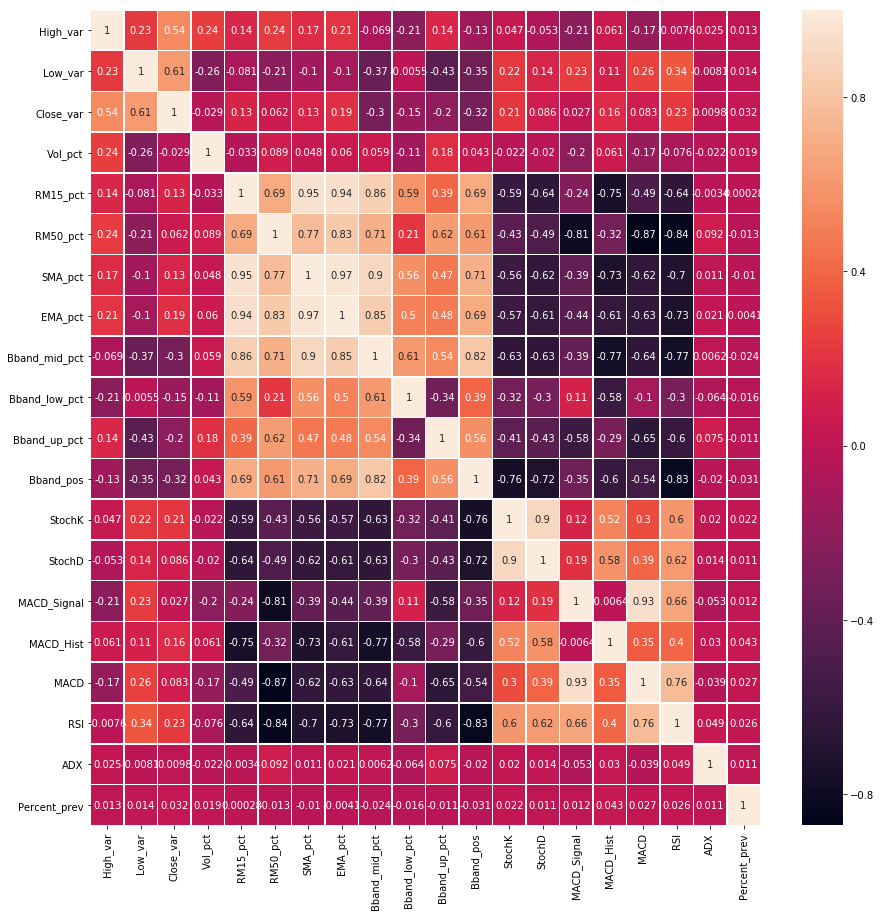

In [38]:
import seaborn as sn
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
corrMatrix=df.corr()
sn.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)

In [46]:
df[df.columns[:-2]].corrwith(df['Percent_prev'])

High_var         0.012867
Low_var          0.013631
Close_var        0.032285
Vol_pct          0.018867
RM15_pct         0.000276
RM50_pct        -0.013461
SMA_pct         -0.010225
EMA_pct         -0.004100
Bband_mid_pct   -0.023833
Bband_low_pct   -0.016433
Bband_up_pct    -0.010853
Bband_pos       -0.030634
StochK           0.021558
StochD           0.011284
MACD_Signal      0.012271
MACD_Hist        0.043009
MACD             0.026798
RSI              0.026366
ADX              0.010991
dtype: float64

In [48]:
#Correlation with output variable
cor_target = abs(corrMatrix["Percent_prev"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Percent_prev    1.0
Name: Percent_prev, dtype: float64

## New data training

In [ ]:
import numpy as np
df=df.dropna()
X=np.array(df.iloc[:,:-2])
y=np.array(df['Target'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# scale the feature MinMax, build array
min_max_scaler = MinMaxScaler()
X_normal = min_max_scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X_normal,y, test_size=0.25, random_state = 42)

In [ ]:
from time import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, SVR
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report

In [ ]:
#QDA removed

names = ["Nearest Neighbors", "Linear SVM", "SVC high C", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="linear", C=1000),
    SVC(gamma=2, C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB()]

assert len(names)==len(classifiers)

In [ ]:
def prediction_classifier(name, clf):
    timer=time()
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    y_pred = clf.predict(X_test)
    return [score, round(time()-timer,1), y_pred]

In [ ]:
results=pd.DataFrame(columns=['Score', 'Time', 'Results', 'Report'])
y_true=y_test
for (name, classifier) in zip(names, classifiers):
    timer=time()
    clf=classifier
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    y_pred = clf.predict(X_test)
    timer=time()-timer
    report=classification_report(y_true, y_pred)
    results.loc[name] = [score, timer, y_pred, report]
    print(name, " done")

In [ ]:
results.loc["TEST"]=[0,0,y_test,""]

In [ ]:
results

In [ ]:
print(results.iat[3,3])

# New exercises

In [ ]:
#SVC fine tuning

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['poly'], 'degree':[1,2,3,5], 'C': [1, 10, 100, 1000] }]

clf = GridSearchCV(SVC(), tuned_parameters, verbose=1)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print(clf.best_params_)
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

In [ ]:
clf= RandomForestClassifier()#max_depth=1000, n_estimators=100, max_features=10)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
y_train_pred=clf.predict(X_train)

In [ ]:
clf.predict(X_train)
unique, counts = np.unique(y_train_pred, return_counts=True)
dict(zip(unique, counts))

In [ ]:
score

In [ ]:
df.head()

# Trying with Tensorflow2.0

In [68]:
def drop_column(column, dataset):
    dfprov=dataset
    try:
        dfprov=dfprov.drop([column], axis=1)
        return dfprov
    except:
        KeyError
        return dfprov

In [69]:
def load_data(file):
    df = pd.read_csv(file, index_col="date") 
    df= df.sort_index(axis = 0, ascending=False)
    df=drop_column('Div amt', df)
    df=drop_column('Split', df)
    df=drop_column('Adj Close', df)
    df['High_var']=(df['High']-df['Open'])/df['Close']*100
    df['Low_var']=(df['Low']-df['Open'])/df['Close']*100
    df['Close_var']=(df['Close']-df['Open'])/df['Close']*100
    df['Vol_pct']=(df['Vol'])/df['Vol'].median()
    
    df= df.sort_index(axis = 0, ascending=True)
    df['RM15']=df['Open'].rolling(window=15).mean()
    df['RM50']=df['Open'].rolling(window=50).mean()
    df['RM15_pct']=(df['RM15']-df['Open'])/df['Close']*100
    df['RM50_pct']=(df['RM50']-df['Open'])/df['Close']*100
    df= df.sort_index(axis = 0, ascending=False)

    df['SMA_pct']=(df['SMA']-df['Open'])/df['Close']*100
    df['EMA_pct']=(df['EMA']-df['Open'])/df['Close']*100
    df['Bband_mid_pct']=(df['Real Middle Band']-df['Close'])/df['Close']*100
    df['Bband_low_pct']=(df['Real Lower Band']-df['Close'])/df['Close']*100
    df['Bband_up_pct']=(df['Real Upper Band']-df['Close'])/df['Close']*100
    df['Bband_pos']=(df['Real Upper Band'] - df['Close'])/(df['Real Upper Band'] - df['Real Lower Band'])
    df['RSI']=df['RSI']/100
    df['ADX']=df['ADX']/100
    df['StochK']=df['SlowK']/100
    df['StochD']=df['SlowD']/100

    #adding prevs
    shift_value=1 #(days)
    df["Prev_open"]=df["Open"].shift(periods=shift_value)
    df["Prev_close"]=df["Close"].shift(periods=shift_value)
    df["Percent_prev"]=round((df["Prev_close"]-df["Prev_open"])/df["Prev_close"]*100,2)
    
    df_to_compute=df[['High_var','Low_var','Close_var','Vol_pct','RM15_pct', 'RM50_pct', 'SMA_pct','EMA_pct',
                 'Bband_mid_pct','Bband_low_pct','Bband_up_pct','Bband_pos', 'StochK', 'StochD', 'MACD_Signal',
                 'MACD_Hist', 'MACD', 'RSI', 'ADX','Percent_prev']].copy()
    
    df_to_compute=df_to_compute.dropna()

    bins = [-1000, 0.1, 1000]
    group_names = [0,1]
    df_to_compute['Target'] = pd.cut(df_to_compute['Percent_prev'], bins, labels=group_names)
    # df_to_compute.head()

    return(df_to_compute)
    

In [72]:
import pandas as pd
import os

cumulative_df = None

for file in os.listdir('./StockHistory/'):
    if file.endswith(".csv") :
        if cumulative_df is None:
            cumulative_df=load_data('./StockHistory/'+file)
        else:
            cumulative_df=cumulative_df.append(load_data('./StockHistory/'+file))
    else:
        continue

In [122]:
cumulative_df

High_var   Low_var  Close_var   Vol_pct  RM15_pct  RM50_pct  \
date                                                                      
2020-01-03  0.097064 -1.601553  -1.091968  0.723468 -0.440023 -4.900752   
2020-01-02  0.287356 -0.862069  -0.862069  0.521400 -1.993934 -6.121648   
2019-12-31  0.646707 -0.263473  -0.263473  0.203120 -1.919361 -5.651737   
2019-12-30  0.285919 -0.690970  -0.214439  0.628205 -2.876658 -6.282106   
2019-12-27  0.568586 -0.544895   0.331675  0.446240 -3.398879 -6.459133   
...              ...       ...        ...       ...       ...       ...   
2000-05-10  1.674485 -5.487735  -3.720970  0.514293  0.726764  7.661919   
2000-05-09  0.986998 -3.497586  -3.497586  0.387617 -2.802888  4.104713   
2000-05-08  1.029785 -0.858598   0.000000  0.181904 -3.976276  3.062876   
2000-05-05  1.643858 -1.903085  -0.259227  0.268700 -4.266438  3.739296   
2000-05-04  0.956061 -1.479019   0.086261  0.323369 -3.761800  4.751198   

             SMA_pct   EMA_pct  Bband_mid_pct  Bband_low_pct  ...  Bband_pos  \
date                                                          ...              
2020-01-03 -1.914584 -1.579471      -0.822616      -7.148750  ...   0.434983   
2020-01-02 -3.384818 -2.710728      -2.522749      -9.465996  ...   0.318331   
2019-12-31 -3.245509 -2.283353      -2.982036     -10.478084  ...   0.301093   
2019-12-30 -4.131523 -2.959495      -3.917084     -11.618299  ...   0.245684   
2019-12-27 -4.503672 -3.253494      -4.835347     -12.422175  ...   0.181333   
...              ...       ...            ...            ...  ...        ...   
2000-05-10 -0.403626  1.066114       3.317345      -2.607659  ...   0.779943   
2000-05-09 -3.707404 -1.983911      -0.209818      -5.731351  ...   0.481000   
2000-05-08 -4.334055 -2.690923      -4.334055      -9.820298  ...   0.105000   
2000-05-05 -3.740380 -2.477943      -3.481152      -9.417096  ...   0.206773   
2000-05-04 -2.895319 -1.856771      -2.981580      -8.938449  ...   0.249730   

              StochK    StochD  MACD_Signal  MACD_Hist    MACD       RSI  \
date                                                                       
2020-01-03  0.059386  0.273136       0.7412    -0.0285  0.7127  0.567402   
2020-01-02  0.227074  0.535469       0.7484     0.0450  0.7933  0.613691   
2019-12-31  0.532950  0.768917       0.7371     0.0916  0.8287  0.613146   
2019-12-30  0.846383  0.871556       0.7142     0.1485  0.8627  0.631779   
2019-12-27  0.927419  0.788438       0.6771     0.1942  0.8713  0.652323   
...              ...       ...          ...        ...     ...       ...   
2000-05-10  0.328956  0.556206      -1.4119     0.3737 -1.0382  0.435949   
2000-05-09  0.521687  0.722378      -1.5053     0.8413 -0.6640  0.470863   
2000-05-08  0.817975  0.850956      -1.7156     1.1448 -0.5708  0.520351   
2000-05-05  0.827473  0.844846      -2.0018     1.0655 -0.9363  0.511573   
2000-05-04  0.907419  0.793728      -2.2682     0.9677 -1.3005  0.505842   

                 ADX  Percent_prev  Target  
date                                        
2020-01-03  0.182951         -1.27       0  
2020-01-02  0.183419         -1.09       0  
2019-12-31  0.176493         -0.86       0  
2019-12-30  0.169808         -0.26       0  
2019-12-27  0.162571         -0.21       0  
...              ...           ...     ...  
2000-05-10  0.189605          1.59       1  
2000-05-09  0.187179         -3.72       0  
2000-05-08  0.189560         -3.50       0  
2000-05-05  0.195941          0.00       0  
2000-05-04  0.202657         -0.26       0  

[143533 rows x 21 columns]

In [123]:
cumulative_df=cumulative_df.dropna()
X=np.array(cumulative_df.iloc[:,:-2])
y=np.array(cumulative_df['Target'])

In [124]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# scale the feature MinMax, build array

min_max_scaler = MinMaxScaler()
X_normal = min_max_scaler.fit_transform(X)

X_train, X_test, y_train, y_test= train_test_split(X_normal,y, test_size=0.25, random_state = 42)

In [125]:
import tensorflow as tf
from tensorflow import keras

In [126]:
model = keras.Sequential([
    keras.layers.Dense(256, activation='sigmoid'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

In [127]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [128]:
model.fit(X_train, y_train, epochs=10)

Train on 107649 samples
Epoch 1/10
107649/107649 [==============================] - 8s 77us/sample - loss: 0.6922 - accuracy: 0.5361
Epoch 2/10
107649/107649 [==============================] - 9s 81us/sample - loss: 0.6897 - accuracy: 0.5417
Epoch 3/10
107649/107649 [==============================] - 8s 77us/sample - loss: 0.6898 - accuracy: 0.5417
Epoch 4/10
107649/107649 [==============================] - 12s 107us/sample - loss: 0.6897 - accuracy: 0.5417
Epoch 5/10
107649/107649 [==============================] - 10s 94us/sample - loss: 0.6897 - accuracy: 0.5416
Epoch 6/10
107649/107649 [==============================] - 9s 86us/sample - loss: 0.6897 - accuracy: 0.5417
Epoch 7/10
107649/107649 [==============================] - 11s 106us/sample - loss: 0.6897 - accuracy: 0.5417
Epoch 8/10
107649/107649 [==============================] - 10s 93us/sample - loss: 0.6897 - accuracy: 0.5417
Epoch 9/10
107649/107649 [==============================] - 10s 92us/sample - loss: 0.6897 - accur

In [129]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
predictions = model.predict(X_test)
print('\nTest accuracy:', test_acc)

35884/1 - 1s - loss: 0.7010 - accuracy: 0.5409

Test accuracy: 0.5409375


In [130]:
np.around(predictions)[:20]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [131]:
y_test

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)